In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch
from IPython.display import HTML, display
import datetime as dt

from utils.diagnostics import compute_summary_statistics
from utils.dataset_utils import aggregate_results

plt.style.use('bmh')
plt.rcParams['lines.linewidth'] = 1

In [3]:
model_names = ["mvo_ls_sample"]
stats_order = ["E[R]", "Std(R)", "Sharpe", "Sortino", "AvgDD", "MaxDD", "% Positive Ret."]

In [4]:
all_summary = []

for model in model_names:

        output_path = os.path.join(os.getcwd(),
                                   "data",
                                   "outputs",
                                   model)
    
        summary = aggregate_results(path=output_path)

        # compute pnl
        summary["pnl"] = summary["returns"] * summary["weights"]

        # add model name
        summary["model"] = model

        # save summary
        all_summary.append(summary)
all_summary_df = pd.concat(all_summary, axis=0)

## 1) Summary Statistics of the Portfolios

In [5]:
all_stats = {}
for model in model_names:

    portfolio_returns = torch.tensor(all_summary_df.loc[all_summary_df["model"] == model].groupby("date").sum()["pnl"])
    stats = compute_summary_statistics(portfolio_returns=portfolio_returns)

    all_stats[model] = stats
all_stats_df = pd.DataFrame(all_stats).T[stats_order]

display(HTML(all_stats_df.to_html()))

,E[R],Std(R),Sharpe,Sortino,AvgDD,MaxDD,% Positive Ret.
mvo_ls_sample,-37.795305,49.504108,-0.763478,-0.575873,-49.312516,-94.975526,0.493261


## 2) Cummulative Returns of the Portfolios

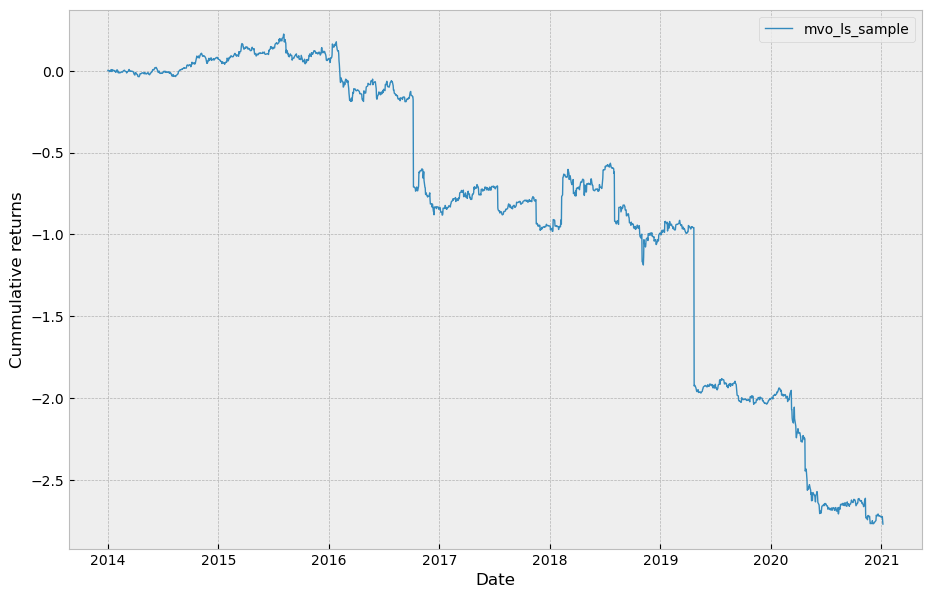

In [6]:

fig, ax = plt.subplots(figsize=(11, 7))
for model in model_names:
    summary_df = all_summary_df.loc[all_summary_df["model"] == model]
    cum_pnl_df = summary_df.groupby("date").sum()[["pnl"]].loc["2014-01-01":].cumsum().reset_index()
    ax.plot(pd.to_datetime(cum_pnl_df['date']), cum_pnl_df["pnl"], label=model)

plt.xlabel("Date")
plt.ylabel("Cummulative returns")
plt.legend(loc='best', fontsize=10)   
# fig.savefig('img/' + ticker + '_' + key1 + '_fs_methods.png')
plt.show()

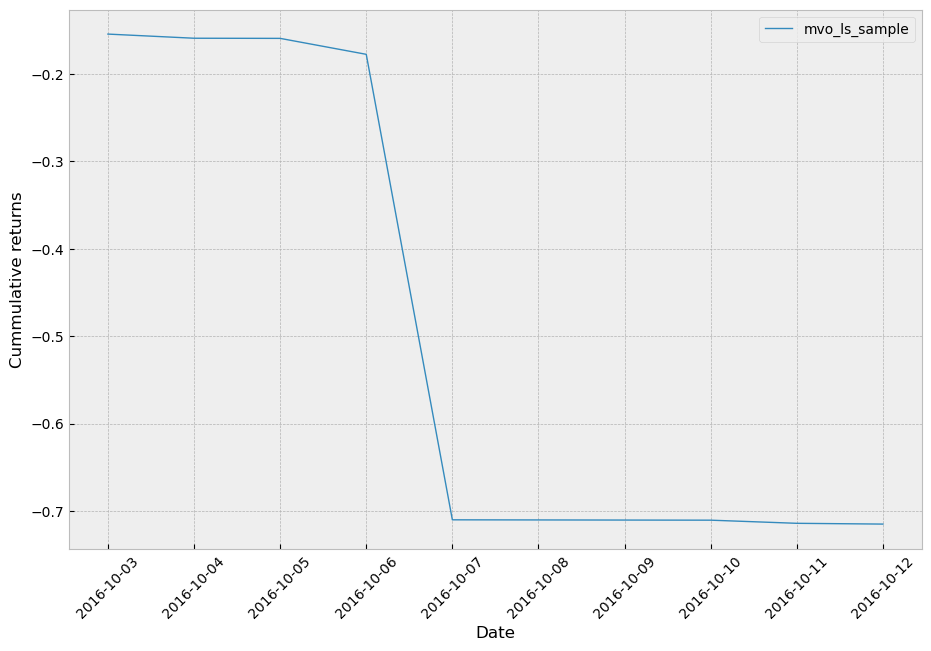

In [27]:
start_date = "2016-10-01"
end_date = "2016-10-13"

zoom_cum_pnl_df = cum_pnl_df.loc[(cum_pnl_df["date"] > start_date) & (cum_pnl_df["date"] < end_date)]

fig, ax = plt.subplots(figsize=(11, 7))
ax.plot(pd.to_datetime(zoom_cum_pnl_df['date']), zoom_cum_pnl_df["pnl"], label=model)
plt.xlabel("Date")
plt.ylabel("Cummulative returns")
plt.legend(loc='best', fontsize=10)   
plt.xticks(rotation=45)
plt.show()


In [28]:
zoom_cum_pnl_df

,date,pnl
718,2016-10-03,-0.154209
719,2016-10-04,-0.158956
720,2016-10-05,-0.159114
721,2016-10-06,-0.177375
722,2016-10-07,-0.710211
723,2016-10-10,-0.710617
724,2016-10-11,-0.714207
725,2016-10-12,-0.715095


## 3) Check weights

In [24]:
all_summary_df.tail()

,date,ticker,returns,weights,pnl,model
1289220,2021-01-06,IEX,-0.001947,0.001617,-3.148525e-06,mvo_ls_sample
1289221,2021-01-06,PCH,0.006807,0.000589,4.011386e-06,mvo_ls_sample
1289222,2021-01-06,MVF,-0.001096,0.000131,-1.435227e-07,mvo_ls_sample
1289223,2021-01-06,IBM,0.017595,0.000305,5.357975e-06,mvo_ls_sample
1289224,2021-01-06,MGA,0.043647,0.001632,7.123216e-05,mvo_ls_sample


In [29]:
check_name = "mvo_ls_sample"
target_date = "2016-10-07"

all_summary_df.loc[(all_summary_df["model"] == check_name)&
                   (all_summary_df["date"] == target_date), ["returns", "weights", "pnl"]].describe()

,returns,weights,pnl
count,695.000000,6.950000e+02,6.950000e+02
mean,0.000326,1.171306e-11,-7.666702e-04
std,0.051119,1.814294e-02,2.020853e-02
min,-0.682489,-4.769354e-01,-5.327519e-01
25%,-0.004779,1.061989e-04,-2.513293e-06
50%,0.000000,6.857264e-04,9.366047e-08
75%,0.004731,1.213129e-03,3.507387e-06
max,1.117032,7.314249e-03,2.561304e-04


In [32]:
all_summary_df.loc[(all_summary_df["model"] == check_name)&(all_summary_df["date"] == target_date)].sort_values("returns", ascending=False)

,date,ticker,returns,weights,pnl,model
518595,2016-10-07,AA,1.117032,-0.476935,-0.532752,mvo_ls_sample
518649,2016-10-07,ETM,0.067391,0.001418,0.000096,mvo_ls_sample
519012,2016-10-07,WSO,0.043556,0.001595,0.000069,mvo_ls_sample
519035,2016-10-07,NC,0.033206,0.001039,0.000034,mvo_ls_sample
518493,2016-10-07,CIEN,0.032275,0.000360,0.000012,mvo_ls_sample
...,...,...,...,...,...,...
518943,2016-10-07,WDR,-0.053178,-0.001544,0.000082,mvo_ls_sample
518990,2016-10-07,TGI,-0.053365,-0.000700,0.000037,mvo_ls_sample
518640,2016-10-07,PKE,-0.105862,0.000406,-0.000043,mvo_ls_sample
519027,2016-10-07,BKE,-0.107477,-0.000313,0.000034,mvo_ls_sample


In [ ]:
all_summary_df.loc[all_summary_df["model"] == check_name, ["returns", "weights", "pnl"]].describe()

In [33]:
all_summary_df.loc[all_summary_df["returns"] >= 1.11]

,date,ticker,returns,weights,pnl,model
85598,2014-05-20,SNV,1.952300,0.000618,0.001206,mvo_ls_sample
397936,2016-02-08,IO,2.804593,-0.031534,-0.088439,mvo_ls_sample
485461,2016-08-02,CRK,1.252103,-0.025829,-0.032341,mvo_ls_sample
518595,2016-10-07,AA,1.117032,-0.476935,-0.532752,mvo_ls_sample
534256,2016-11-08,EWJ,1.393337,0.000056,0.000078,mvo_ls_sample
539251,2016-11-17,DSU,1.112717,-0.000183,-0.000204,mvo_ls_sample
644111,2017-06-16,XRX,1.388816,0.000037,0.000052,mvo_ls_sample
667049,2017-08-02,TDW,3.291447,0.001388,0.004567,mvo_ls_sample
721634,2017-11-21,MTW,1.415982,-0.006528,-0.009243,mvo_ls_sample
978915,2019-04-23,RAD,3.096452,-0.317214,-0.982237,mvo_ls_sample


<Axes: title={'center': 'AA returns'}, xlabel='date'>

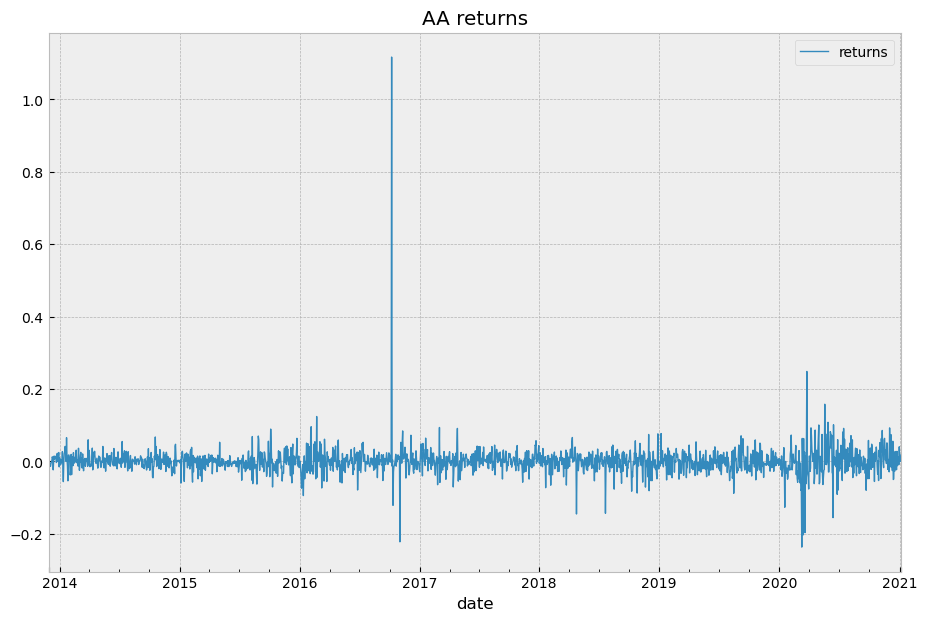

In [34]:
stock_name = "AA"

check_stock_df = all_summary_df.loc[(all_summary_df["model"] == check_name)&(all_summary_df["ticker"] == stock_name)][["date", "returns"]]
check_stock_df["date"] = pd.to_datetime(check_stock_df["date"])
check_stock_df.set_index("date", inplace=True)

check_stock_df.plot(figsize=(11, 7), title="{} returns".format(stock_name))

## 4) Check Returns from Raw Data

In [68]:
d1 = "2016-10-05"
d2 = "2016-10-06"

f1 = os.path.join(os.getcwd(), os.getcwd(), "data", "inputs", "US_CRSP_NYSE", "2016", "{}.csv.gz".format(d1).replace("-", ""))
f2 = os.path.join(os.getcwd(), os.getcwd(), "data", "inputs", "US_CRSP_NYSE", "2016", "{}.csv.gz".format(d2).replace("-", ""))
stock_name = "AA"

tmp_df1 = pd.read_csv(f1, compression='gzip', on_bad_lines='skip')
tmp_df2 = pd.read_csv(f2, compression='gzip', on_bad_lines='skip')

In [70]:
tmp_df1.loc[tmp_df1["ticker"] == stock_name]

,Unnamed: 0,ticker,open,high,low,close,volume,OPCL,pvCLCL,prevAdjClose,SPpvCLCL,sharesOut,PERMNO,SICCD,PERMCO,prevRawOpen,prevRawClose,prevAdjOpen
15,16,AA,10.25,10.41,10.17,10.4,29736798,0.014528,0.019608,10.2,0.004297,1315380,24643,3334,20060,10.06,10.2,10.06


In [71]:
tmp_df2.loc[tmp_df2["ticker"] == stock_name]

,Unnamed: 0,ticker,open,high,low,close,volume,OPCL,pvCLCL,prevAdjClose,SPpvCLCL,sharesOut,PERMNO,SICCD,PERMCO,prevRawOpen,prevRawClose,prevAdjOpen
15,16,AA,31.07,32.02,31.07,31.78,10026484,0.022594,0.01859,31.2,0.000482,438460,24643,3334,20060,10.25,10.4,30.75
